<a href="https://colab.research.google.com/github/sprince0031/100-Days-Of-ML/blob/master/Day_0_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


4


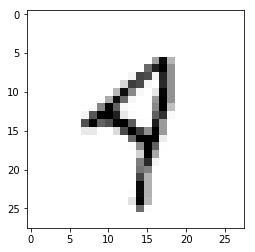

In [0]:
import matplotlib.pyplot as plt
image_index = 6778
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
print(x_train.shape)
x_test.shape

(60000, 28, 28)


(10000, 28, 28)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# print(x_train.shape)
# x_test.shape
input_shape = (28, 28, 1)
# converting to floating point for division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalising by diving by max RGB value
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating the sequential model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=3)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
60000/60000 [==============================] - 12s 207us/step - loss: 0.2133 - acc: 0.9345
Epoch 2/3
60000/60000 [==============================] - 8s 127us/step - loss: 0.0824 - acc: 0.9743
Epoch 3/3
60000/60000 [==============================] - 7s 121us/step - loss: 0.0561 - acc: 0.9826


In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 48us/step


[0.05643639242836507, 0.9824]

9


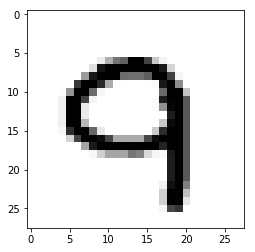

In [0]:
image_index=3459
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())